In [ ]:
import zipfile
import os

local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('') # Ekstrak di direktori saat ini
zip_ref.close()

print("Dataset berhasil diekstrak!")

Dataset berhasil diekstrak!


TensorFlow Version: 2.19.0
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 238ms/step - accuracy: 0.5485 - loss: 0.6964 - val_accuracy: 0.6780 - val_loss: 0.5956
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.6783 - loss: 0.5962 - val_accuracy: 0.7165 - val_loss: 0.5616
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.7164 - loss: 0.5521 - val_accuracy: 0.7405 - val_loss: 0.5297
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 234ms/step - accuracy: 0.7322 - loss: 0.5345 - val_accuracy: 0.7350 - val_loss: 0.5251
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.7520 - loss: 0.5044 - val_accuracy: 0.7675 - val_loss: 0.5046
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.7529 - loss: 0.4890 - val_accuracy: 0.7600 - val_loss: 0.5031
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.7745 - loss: 0.4681 - val_accuracy: 0.7710 - val_loss: 0.4977
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.7768 - loss: 0

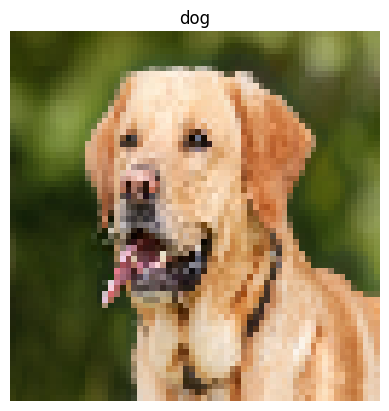

In [ ]:
# --- Langkah 1: Import Library ---
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt # Opsional: untuk menampilkan gambar

print(f"TensorFlow Version: {tf.__version__}")

# --- Langkah 2: Pra Pengolahan Data ---

# Langkah 2.1: Preprocessing Data Training (Augmentasi Data)
# Tujuannya agar model tidak overfitting dengan cara memanipulasi gambar
train_datagen = ImageDataGenerator(
    rescale = 1./255,       # Normalisasi piksel ke range 0-1
    shear_range = 0.2,      # Memiringkan gambar
    zoom_range = 0.2,       # Zoom in/out
    horizontal_flip = True  # Membalik gambar secara horizontal
)

# Memuat data training
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size = (64, 64), # Mengubah ukuran semua gambar menjadi 64x64
    batch_size = 32,
    class_mode = 'binary'   # Karena hanya ada 2 kelas (Cat vs Dog)
)

# Langkah 2.2: Preprocessing Data Testing
# Data test TIDAK boleh diaugmentasi (hanya di-rescale)
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

# --- Langkah 3: Pembuatan Model CNN ---

# 3.1 Inisiasi Model
cnn = tf.keras.models.Sequential()

# 3.2 Layer Konvolusi 1 & 3.3 Pooling 1
# Input shape harus sesuai dengan target_size di atas (64, 64, 3 channel warna RGB)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# 3.4 Layer Konvolusi 2 & Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# 3.5 Flattening (Mengubah matrix 2D menjadi vektor 1D)
cnn.add(tf.keras.layers.Flatten())

# 3.6 Fully Connected Layer (Hidden Layer)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# 3.7 Output Layer
# Gunakan 'sigmoid' karena output biner (0 atau 1)
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# 3.8 Compile Model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Ringkasan arsitektur model
cnn.summary()

# --- Langkah 4: Training (Fit) CNN ---
# Epochs = 25 berarti model akan belajar dari seluruh dataset sebanyak 25 kali
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

# --- Langkah 5: Prediksi Single Image ---

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    try:
        # Load gambar dan ubah ukuran ke 64x64
        test_image = image.load_img(image_path, target_size = (64, 64))

        # Ubah gambar menjadi array numpy
        test_image_array = image.img_to_array(test_image)

        # Tambahkan dimensi batch (karena model mengharapkan batch input)
        test_image_expand = np.expand_dims(test_image_array, axis = 0)

        # Lakukan prediksi
        result = cnn.predict(test_image_expand)

        # Cek indeks kelas (biasanya {'cats': 0, 'dogs': 1})
        print("Class Indices:", training_set.class_indices)

        if result[0][0] == 1:
            prediction = 'dog'
        else:
            prediction = 'cat'

        print(f"Prediksi untuk {image_path}: {prediction}")

        # (Opsional) Tampilkan gambar
        plt.imshow(test_image)
        plt.title(prediction)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error memproses gambar {image_path}: {e}")

# Contoh penggunaan (Pastikan path file benar)
# Jika folder 'single_prediction' tidak ada di zip,
# Anda bisa mencoba mengambil salah satu gambar dari test_set
sample_image_path = 'dataset/single_prediction/cat_or_dog_1.jpg'

# Cek apakah file ada sebelum prediksi
import os
if os.path.exists(sample_image_path):
    predict_image(sample_image_path)
else:
    print(f"File {sample_image_path} tidak ditemukan. Coba ganti path gambar.")